In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from scipy import stats
from scipy.stats import zscore
from math import radians, cos, sin, asin, sqrt
import pydot_ng as pydot
import keras
from keras import metrics
from keras import regularizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model

import tensorflow as tf

In [3]:
depev = pd.read_csv('depev_final.csv')
depev.drop(depev.columns[depev.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
depev.head()

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,PPSU,PSTRAT,HISPALLP_A,RACEALLP_A,...,ANGEV_A,CHDEV_A,CHLEV_A,HYPEV_A,PHSTAT_A,AVAIL_A,INTV_QRT,WTFA_A,WTIA_A,POVRATTC_A
0,4,9,3,0,60000,2,2,122,3,2,...,2,2,1,2,3,1,1,13177.008,7601.336,2.96
1,4,9,3,0,50000,0,2,122,2,1,...,2,2,2,2,1,1,1,6140.552,3344.434,2.97
2,4,12,3,0,65000,1,2,122,2,1,...,2,2,1,1,3,1,1,9191.061,6949.498,4.28
3,4,14,5,0,120000,0,2,122,1,8,...,2,2,2,1,2,1,1,7900.035,6446.327,7.13
4,1,4,1,0,30000,0,2,115,2,1,...,1,1,1,1,4,1,1,10875.772,8646.586,1.13


In [3]:
phq = depev[['PHQ88_A', 'PHQ87_A', 'PHQ86_A', 'PHQ85_A', 'PHQ84_A', 'PHQ83_A', 'PHQ82_A', 'PHQ81_A', 'DEPEV_A']]
phq.head()

,PHQ88_A,PHQ87_A,PHQ86_A,PHQ85_A,PHQ84_A,PHQ83_A,PHQ82_A,PHQ81_A,DEPEV_A
0,1,1,1,1,1,1,1,1,2
1,1,2,1,1,1,1,1,1,2
2,1,1,1,1,1,2,1,1,2
3,1,1,1,1,1,2,1,1,2
4,1,4,2,2,3,2,3,4,1


In [4]:
phq.to_csv('phq.csv')

URBRRL = 2013 NCHS Urban-Rural Classification Scheme for Counties \
RATCAT = Ratio of family income to poverty threshold for SA's family \
INCGRP = Sample adult family income (grouped) \
RACEALLP = Single and multiple race groups \
BMICAT = Categorical body mass index, public use \
NOTCOV = Coverage status as used in Health United States \
EDUC = Educational level of sample adult \
PCNTFAM = Number of persons in Sample Adult family, top-coded 6+ \
HISP = Recode: Hispanic ethnicity of SA \
REGION = Household region \
SEX = Sex of Sample Adult \
AGEP = Age of SA (top coded) \
SCHCURENR = Currently in school \
NATUSBORN = Born in U.S. or U.S. territory \
AFVET = Ever serve active duty military \
MARITAL = Sample adult's current marital status \
SMKEV = Ever smoked 100 cigarettes \
LASTDR = Time since last saw doctor \
PAYBLL12M = Problems paying medical bills, past 12m \
DIBEV = Ever had diabetes \
CANEV = Ever been told you had cancer \
ASEV = Ever had asthma

In [4]:
key_char = depev[['URBRRL', 'RATCAT_A', 'INCGRP_A', 'RACEALLP_A', 'BMICAT_A', \
                        'NOTCOV_A', 'EDUC_A', 'PCNTFAM_A', \
                        'HISP_A', 'REGION', 'SEX_A', 'AGEP_A', \
                        'SCHCURENR_A', 'NATUSBORN_A', \
                        'AFVET_A', 'MARITAL_A', 'SMKEV_A', 'LASTDR_A', 'PAYBLL12M_A', \
                        'DIBEV_A', 'CANEV_A', 'ASEV_A', 'DEPEV_A']]
key_char.head()

,URBRRL,RATCAT_A,INCGRP_A,RACEALLP_A,BMICAT_A,NOTCOV_A,EDUC_A,PCNTFAM_A,HISP_A,REGION,...,NATUSBORN_A,AFVET_A,MARITAL_A,SMKEV_A,LASTDR_A,PAYBLL12M_A,DIBEV_A,CANEV_A,ASEV_A,DEPEV_A
0,4,9,3,2,3,2,7,3,2,3,...,1,1,1,2,1,2,2,2,2,2
1,4,9,3,1,2,2,6,2,2,3,...,1,2,1,1,1,2,2,2,2,2
2,4,12,3,1,3,2,5,2,2,3,...,1,1,1,2,1,2,2,1,2,2
3,4,14,5,8,4,2,7,2,1,3,...,1,1,1,2,1,2,2,2,2,2
4,1,4,1,1,4,2,5,4,2,3,...,1,2,1,1,1,1,1,2,1,1


In [8]:
key_char.to_csv("key_characteristics.csv")

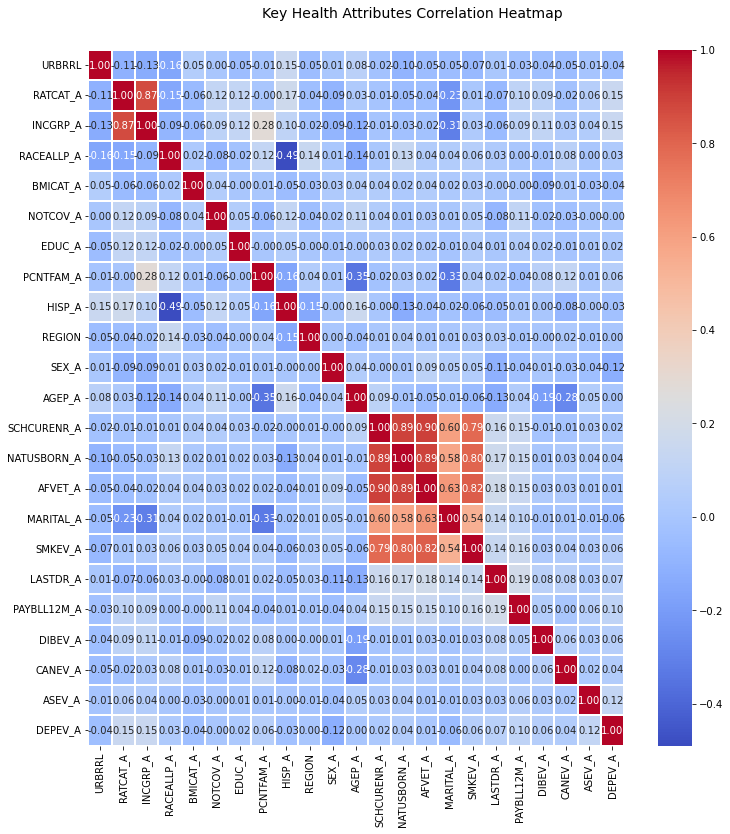

In [5]:
f, ax = plt.subplots(figsize=(12, 12))
corr = key_char.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Key Health Attributes Correlation Heatmap', fontsize=14)

In [11]:
depev_corr = corr['DEPEV_A']
depev_corr.head()

URBRRL       -0.043493
RATCAT_A      0.148693
INCGRP_A      0.145246
RACEALLP_A    0.034162
BMICAT_A     -0.038094
Name: DEPEV_A, dtype: float64

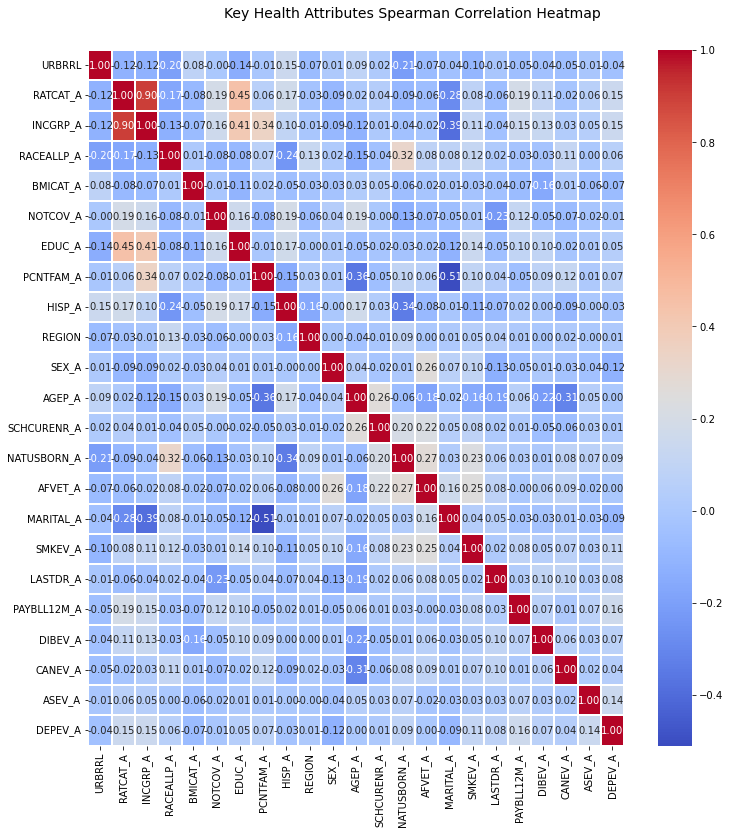

In [6]:
f, ax = plt.subplots(figsize=(12, 12))
spearman_corr = key_char.corr(method='spearman')
hm = sns.heatmap(round(spearman_corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Key Health Attributes Spearman Correlation Heatmap', fontsize=14)

In [8]:
spearman_corr2 = spearman_corr['DEPEV_A']
spearman_corr2.sort_values(ascending=False)

DEPEV_A        1.000000
PAYBLL12M_A    0.158619
INCGRP_A       0.146223
RATCAT_A       0.145259
ASEV_A         0.139056
SMKEV_A        0.113022
NATUSBORN_A    0.085774
LASTDR_A       0.078124
PCNTFAM_A      0.073155
DIBEV_A        0.066274
RACEALLP_A     0.057208
EDUC_A         0.047095
CANEV_A        0.043893
SCHCURENR_A    0.008443
REGION         0.005548
AGEP_A         0.002319
AFVET_A        0.000706
NOTCOV_A      -0.012188
HISP_A        -0.033992
URBRRL        -0.043646
BMICAT_A      -0.065114
MARITAL_A     -0.094493
SEX_A         -0.121562
Name: DEPEV_A, dtype: float64

# need to update: 
Highest correlations: \
ASEV = ever had asthma \
DIBEV = ever had diabetes \ 
CANEV = ever had cancer \
PAYBLL12M = had problems paying bills in past 12 months
RATCAT = ratio of family income to poverty level \
INCGRP = family income \

Lowest correlations: \
NOTCOV = health coverage \
REGION = household region \
HOUTENURE = 
AGEP = age \
INCWRKO = income from job \
HEIGHTTC = height \
AFVET = ever serve in military

In [12]:
depev_corr.sort_values(ascending=False)

DEPEV_A        1.000000
RATCAT_A       0.148693
INCGRP_A       0.145246
ASEV_A         0.124397
PAYBLL12M_A    0.100994
LASTDR_A       0.069653
SMKEV_A        0.061237
PCNTFAM_A      0.060902
DIBEV_A        0.059122
NATUSBORN_A    0.044298
CANEV_A        0.037767
RACEALLP_A     0.034162
EDUC_A         0.016540
SCHCURENR_A    0.016425
AFVET_A        0.013392
REGION         0.004176
AGEP_A         0.003039
NOTCOV_A      -0.000236
HISP_A        -0.033992
BMICAT_A      -0.038094
URBRRL        -0.043493
MARITAL_A     -0.064052
SEX_A         -0.121269
Name: DEPEV_A, dtype: float64